In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
X.shape

(1000, 2)

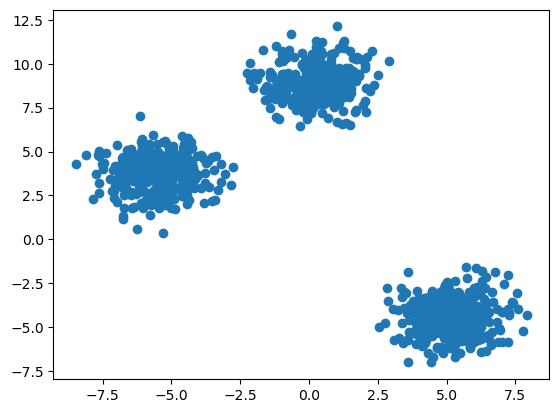

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [13]:
wcss

[36285.588412671335,
 8328.553214543637,
 1377.5862843080135,
 1192.6048934695493,
 1034.4670720915324,
 888.1371835343263,
 785.6796910773354,
 704.3674452710602,
 616.9606010386957,
 559.2172244147284]

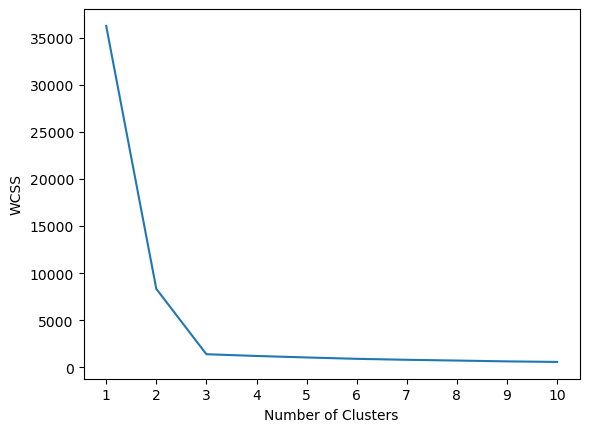

In [14]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
### as per elbow methiod we used k=3


In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [19]:
y_labels=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


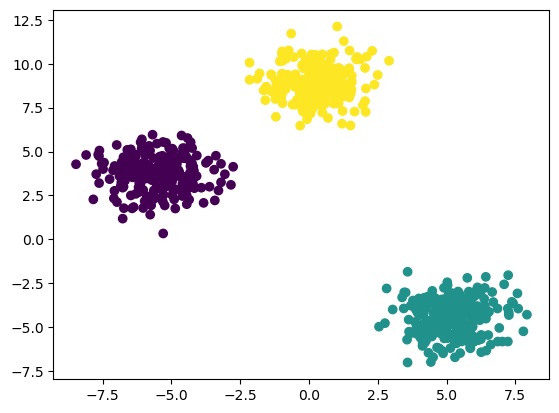

In [20]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [22]:
y_test_labels=kmeans.predict(X_test)

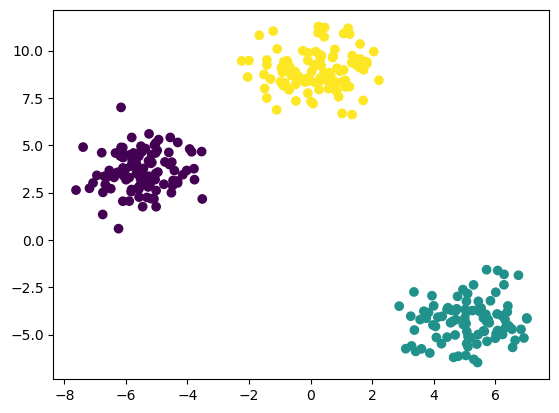

In [23]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [24]:
## knee locator


In [25]:
!pip install kneed

In [26]:
from kneed import KneeLocator

In [28]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
sil_coff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    sil_coff.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [31]:
sil_coff

[0.7271977071483245,
 0.8068947097948808,
 0.6359924564185829,
 0.4849870721139679,
 0.3376616594716856,
 0.33299303590916085,
 0.3455993476492138,
 0.3465566105539645,
 0.3426949488969327]

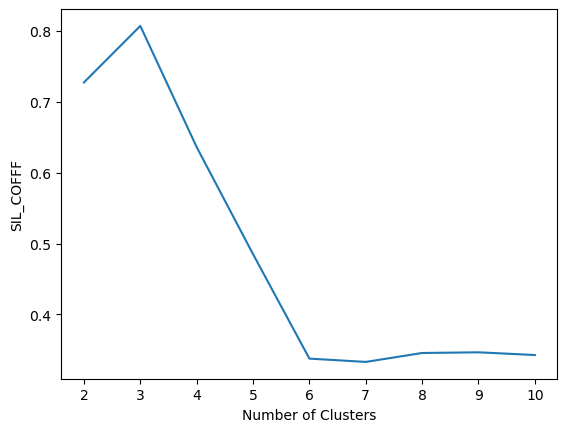

In [32]:
plt.plot(range(2,11),sil_coff)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SIL_COFFF")
plt.show()